In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
csv_file_path=(r"E:\python\project\project_ml\insurance\artifact\data_ingestion\2022-07-27_19-24-34\raw_data\insurance.csv")
insurance_df=pd.read_csv(csv_file_path)

<AxesSubplot:ylabel='Frequency'>

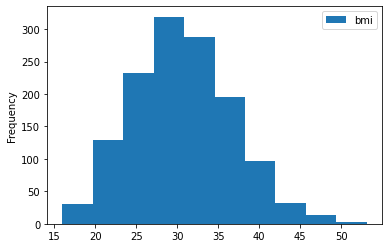

In [9]:
insurance_df[["bmi"]].plot(kind="hist")

In [10]:
insurance_df["bmi_cat"]=pd.cut(
    insurance_df["bmi"],
    bins=[0.0,20.0,30.0,40.0,50.0, np.Inf],
    labels=[1,2,3,4,5]
)

In [11]:
insurance_df.bmi_cat.value_counts()

3    607
2    597
4     88
1     43
5      3
Name: bmi_cat, dtype: int64

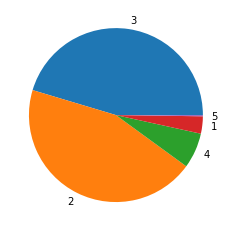

In [12]:
plt.pie(insurance_df.bmi_cat.value_counts(),
        labels=insurance_df.bmi_cat.value_counts().index)
plt.show()

In [13]:
os.getcwd()

'e:\\python\\project\\project_ml\\notebook'

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

In [5]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)

In [14]:
for train_ix, test_ix in split.split(insurance_df,insurance_df["bmi_cat"]):
    print(train_ix, test_ix)

[ 776 1040  270 ... 1286  149  725] [  88  251  948  441 1279  923  538  208  521   13  413  171   46  882
  207  291  486  385   63  497  926 1157 1236 1265 1064  479  544  937
 1332  742  528  602  198  879  447   56  943 1210  836  514 1092  315
  811  583  598  116 1205  747 1186  783   27 1106 1120  508  849  136
  547  203  279  252  256  545 1189  277  613  781 1142  562 1119 1155
 1059  202  512  953  666 1077  448  294    7  821 1045 1224  816  983
  626 1139 1321  462  233 1162  364  249  866  511  804 1038 1178  774
  453  536  884  485  340  107 1191 1113 1103  843  412 1291  889  183
  815   72  382  899  751  548  361  331  988 1165 1147 1267 1255 1037
 1046  956   81 1172  304  439  978  722  526  910  592  730 1098 1048
  812  493  891  117  674  980  266 1125 1141 1088  540  165 1035  797
 1225  966  105   26 1065   74 1272 1019  349 1211  296 1110    3 1212
  257 1283 1025  793  476  635  684 1238  531  145  814  682  942  902
 1128  958  516  222  553 1160  166 1207 

In [23]:
train_df=insurance_df.iloc[train_ix]
train_df.shape


(1070, 8)

In [22]:
train_df.head()

,age,sex,bmi,children,smoker,region,expenses,bmi_cat
776,40,male,32.3,2,no,northwest,6986.70,3
1040,35,female,28.0,0,yes,northwest,20234.85,2
270,18,male,29.4,1,no,southeast,1719.44,2
992,50,female,31.6,2,no,southwest,10118.42,3
431,29,female,20.2,2,no,northwest,4906.41,2


In [24]:
test_df=insurance_df.iloc[test_ix]
test_df.shape

(268, 8)

In [18]:
test_df.head()

,age,sex,bmi,children,smoker,region,expenses,bmi_cat
88,46,female,27.7,0,no,northwest,8026.67,2
251,63,female,32.2,2,yes,southwest,47305.31,3
948,42,male,31.3,0,no,northwest,6358.78,3
441,33,female,33.5,0,yes,southwest,37079.37,3
1279,25,female,26.8,2,no,northwest,4189.11,2


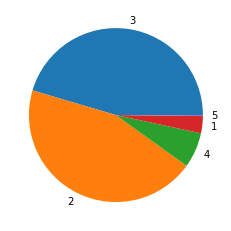

In [25]:
plt.pie(train_df.bmi_cat.value_counts(),
        labels=train_df.bmi_cat.value_counts().index)
plt.show()


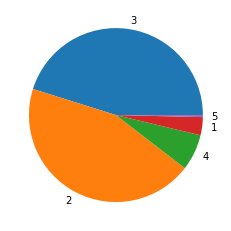

In [26]:
plt.pie(test_df.bmi_cat.value_counts(),
        labels=test_df.bmi_cat.value_counts().index)
plt.show()


In [27]:
insurance_df.dtypes.index, insurance_df.dtypes.values

(Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses',
        'bmi_cat'],
       dtype='object'),
 array([dtype('int64'), dtype('O'), dtype('float64'), dtype('int64'),
        dtype('O'), dtype('O'), dtype('float64'),
        CategoricalDtype(categories=[1, 2, 3, 4, 5], ordered=True)],
       dtype=object))

In [30]:
data_type=list(map(lambda x:str(x).replace("dtype('","").replace("')",""),insurance_df.dtypes.values))

In [31]:
column=insurance_df.columns

In [32]:
dict(zip(column,data_type))

{'age': 'int64',
 'sex': 'object',
 'bmi': 'float64',
 'children': 'int64',
 'smoker': 'object',
 'region': 'object',
 'expenses': 'float64',
 'bmi_cat': 'category'}